# Exercise 1

I'm going to do it in python instead of octave

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_food_trucks = pd.read_csv('prompt/ex1data1.txt', header=None, names=['city_pop', 'food_truck_profit'])
df_food_trucks.head()

,city_pop,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


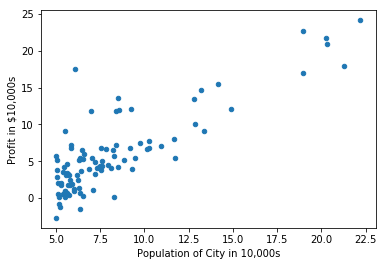

In [3]:
df_food_trucks.plot(x='city_pop', y='food_truck_profit', kind='scatter')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

# Single Var Lin Reg with Gradient Descent

In [76]:
X = pd.DataFrame(df_food_trucks['city_pop']).copy()
X['const'] = 1
X = X[X.columns[::-1]]
print(X.shape)
X.head()

(97, 2)


,const,city_pop
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [77]:
Y = df_food_trucks['food_truck_profit'].values.reshape(-1, 1)
Y.shape

(97, 1)

In [102]:
def cost(thetas, X, Y):
    """thetas are Nx1, Uses global X (MxN) and Y (MX1)"""
    y_hat = np.dot(X, thetas)
    return np.sum((Y - y_hat)**2) / (2*X.shape[0])

In [103]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [154]:
cost(theta, X, Y)

32.072733877455676

array([[-3.24140214],
       [ 1.1272942 ]])

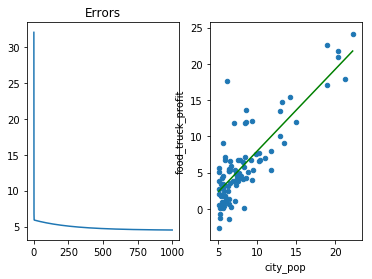

In [142]:
SETTLING = 1e-20
LEARNING_RATE = 1e-2
MAX_ITERATIONS = 1000

def gradient_descent(starting_theta, X, Y):
    """Perform gradient descent"""
    # Starting values
    theta = np.copy(starting_theta)
    errors = [cost(theta, X, Y)]
    
    for _ in range(MAX_ITERATIONS):
        # Iterate
        y_hat = np.dot(X, theta)
        delta = np.sum((y_hat - Y) * X) * LEARNING_RATE / X.shape[0]
        theta -= delta.values.reshape(-1, 1)

        # Check convergence
        errors.append(cost(theta, X, Y))
        if (errors[-2] - errors[-1])**2 < SETTLING:
            break

    return theta, errors
        
theta_descent, errors = gradient_descent(theta, X, Y)

plt.subplot(1, 2, 1)
plt.plot(errors)
plt.title('Errors')

plt.subplot(1, 2, 2)
X_sorted = X.sort_values('city_pop')
plt.plot(X_sorted['city_pop'], np.dot(X_sorted, theta_descent), 'g')
df_food_trucks.plot(x='city_pop', y='food_truck_profit', kind='scatter', ax=plt.gca())

theta_descent

In [138]:
predict1 = [1, 3.5] @ theta_descent
predict1

array([ 0.70412756])

In [139]:
predict2 = [1, 7] @ theta_descent
predict2

array([ 4.64965727])

# Error Space

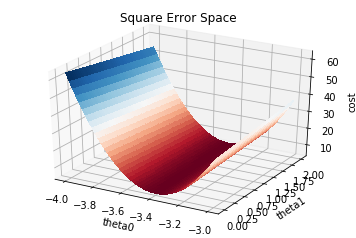

In [165]:
n_samples = 50
J = np.zeros((n_samples, n_samples))

theta0_options = np.linspace(-4, -3, n_samples)
theta1_options = np.linspace(0, 2, n_samples)
for i, theta0 in enumerate(theta0_options):
    for j, theta1 in enumerate(theta1_options):
        J[i, j] = cost([[theta0], [theta1]], X, Y)


from mpl_toolkits.mplot3d import Axes3D
ax = plt.gca(projection='3d')

theta0_ticks, theta1_ticks = np.meshgrid(theta0_options, theta1_options)

ax.plot_surface(theta0_ticks, theta1_ticks, J, cmap='RdBu',
                       linewidth=0, antialiased=False)
plt.xlabel('theta0')
plt.ylabel('theta1')
ax.set_zlabel('cost', rotation=90)
plt.title('Square Error Space')

# Normal Equation

In [172]:
theta_norm = np.linalg.pinv(X) @ Y
theta_norm

array([[-3.89578088],
       [ 1.19303364]])

In [174]:
cost(theta_norm, X, Y)

4.4769713759751788

In [175]:
cost(theta_descent, X, Y)

4.5159555030789118

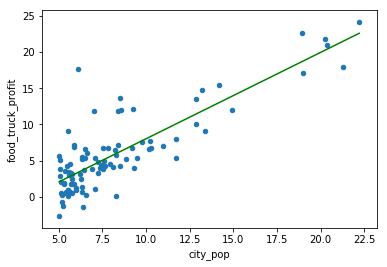

In [173]:
X_sorted = X.sort_values('city_pop')
plt.plot(X_sorted['city_pop'], np.dot(X_sorted, theta_norm), 'g')
df_food_trucks.plot(x='city_pop', y='food_truck_profit', kind='scatter', ax=plt.gca())